In [0]:
import tensorflow as tf

In [2]:
tf.__version__

'1.12.0'

In [0]:
hello=tf.constant('hello')

In [4]:
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [0]:
with tf.Session() as sess:
  result=sess.run(hello+' world')
  

In [6]:
result

b'hello world'

In [0]:
cons=tf.constant(10)

In [0]:
fill_mat=tf.fill((4,4),10)

In [0]:
myzeros=tf.zeros((4,4))

In [0]:
myones=tf.ones((4,4))

In [0]:
myrandn=tf.random_normal((4,4),mean=0,stddev=1.0)

In [0]:
myrandu=tf.random_uniform((4,4),minval=0,maxval=1)

In [14]:
tf.get_default_graph()

In [0]:
graph_one=tf.get_default_graph()

In [0]:
graph_two=tf.Graph()

In [18]:
with graph_two.as_default():
  
  print(tf.get_default_graph())

In [19]:
graph_two

In [0]:
n_feature=10
n_dense=3

In [0]:
x=tf.placeholder(tf.float32,(None,n_feature))

In [0]:
W=tf.Variable(tf.random_normal([n_feature,n_dense]))
b=tf.Variable(tf.ones([n_dense]))

In [0]:

xW=tf.matmul(x,W)
y=tf.add(xW,b)

In [0]:
a=tf.sigmoid(y)

In [0]:
init=tf.global_variables_initializer()

In [0]:
import numpy as np
with tf.Session() as sess:
  sess.run(init)
  layer=sess.run(a,feed_dict={x:np.random.random([1,n_feature])})

In [32]:
layer

array([[0.88548195, 0.9163186 , 0.9518222 ]], dtype=float32)

In [0]:
## simple regression example

In [0]:
x_data=np.linspace(0,10,10) +np.random.uniform(-1.5,1.5,10)

In [53]:
x_data

array([-1.24334272,  0.86053468,  1.7196521 ,  4.19561186,  4.76631666,
        6.36283463,  5.20006353,  9.06549452,  9.53753718,  9.57079077])

In [0]:
y_label=np.linspace(0,10,10) +np.random.uniform(-1.5,1.5,10)

In [55]:
y_label

array([ 0.39330668,  2.5077889 ,  0.74327695,  4.45427141,  4.35335295,
        7.02023122,  7.46588398,  7.41704895, 10.02340205, 10.22821759])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

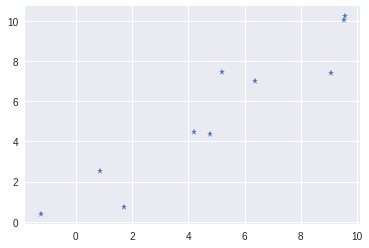

In [59]:
plt.plot(x_data,y_label,'*')

In [0]:
m=tf.Variable(0.2,tf.float32)

In [0]:
b=tf.Variable(0.1,tf.float32)

In [0]:
error=0
for x1,y1 in zip(x_data,y_label):
  y_pred=tf.cast(m,tf.float32)*tf.cast(x1,tf.float32) + tf.cast(b,tf.float32)
  error+=(y1-y_pred)**2

In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [0]:
train=optimizer.minimize(error)

In [0]:
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(1,50):
    sess.run(train)
  final_m,final_b=sess.run([m,b])

In [98]:
final_m

0.96691793

In [99]:
final_b

0.43018833

In [0]:
y_pred_new=x_data*final_m+final_b

In [101]:
y_pred_new

array([-0.77202204,  1.26225474,  2.09295078,  4.48700067,  5.03882538,
        6.58252723,  5.45822301,  9.19577755,  9.65220405,  9.68435755])

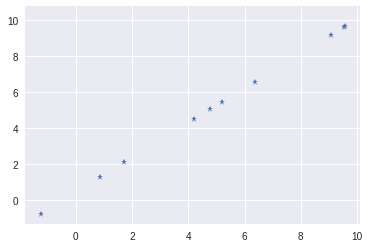

In [106]:
plt.plot(x_data,y_pred_new,"*")
plt.plot(x_data,y_label,"+")

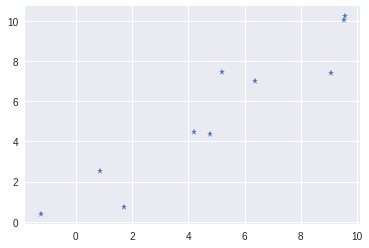

In [105]:
plt.plot(x_data,y_label,"*")

In [0]:
##regression

In [0]:
x_data = np.linspace(0.0,10.0,1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [110]:
noise

array([ 1.3425857 ,  0.69563128, -0.23244357, ..., -0.42037763,
       -0.38130623, -1.39788413])

In [0]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [0]:
import pandas as pd
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [115]:
my_data.head()

,X Data,Y
0,0.00000,6.342586
1,0.00001,5.695636
2,0.00002,4.767566
3,0.00003,3.700291
4,0.00004,5.613905


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


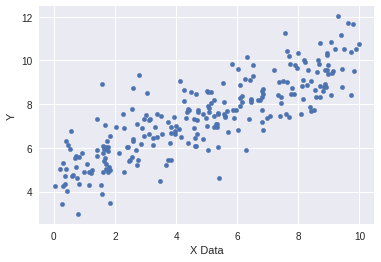

In [116]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [0]:
batch_size = 8

In [0]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [0]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model = m*xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [132]:
model_m

0.52504

In [133]:
model_b

4.9203467

In [0]:
y_hat = x_data * model_m + model_b

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


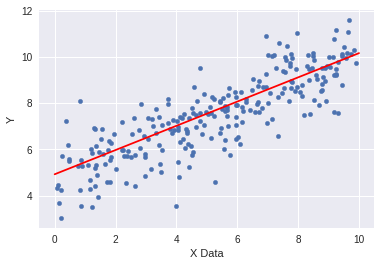

In [135]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [0]:
#tf.estimator

In [0]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [0]:
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_data = np.linspace(0.0,10.0,1000000)
y_true =  (0.5 * x_data ) + 5 + noise
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [0]:
input_fun=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

In [146]:
estimator.train(input_fn=input_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp5c5wy4eo/model.ckpt.
INFO:tensorflow:loss = 294.40643, step = 0
INFO:tensorflow:global_step/sec: 362.181
INFO:tensorflow:loss = 13.135366, step = 100 (0.279 sec)
INFO:tensorflow:global_step/sec: 483.645
INFO:tensorflow:loss = 23.138754, step = 200 (0.209 sec)
INFO:tensorflow:global_step/sec: 534.549
INFO:tensorflow:loss = 8.804827, step = 300 (0.183 sec)
INFO:tensorflow:global_step/sec: 532.627
INFO:tensorflow:loss = 15.508374, step = 400 (0.187 sec)
INFO:tensorflow:global_step/sec: 544.806
INFO:tensorflow:loss = 2.8073046, step = 500 (0.184 sec)
INFO:tensorflow:global_step/sec: 587.554
INFO:tensorflow:loss = 5.573956,

In [147]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-02-19:29:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5c5wy4eo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-02-19:29:14
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1512227, global_step = 1000, label/mean = 7.5001154, loss = 4.604891, prediction/mean = 7.32806
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

In [148]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-02-19:29:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5c5wy4eo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-02-19:29:27
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1087377, global_step = 1000, label/mean = 7.4861345, loss = 4.434951, prediction/mean = 7.288639
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [149]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.1512227, 'label/mean': 7.5001154, 'loss': 4.604891, 'prediction/mean': 7.32806, 'global_step': 1000}
eval metrics: {'average_loss': 1.1087377, 'label/mean': 7.4861345, 'loss': 4.434951, 'prediction/mean': 7.288639, 'global_step': 1000}


In [0]:
##prdictions

In [151]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5c5wy4eo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2918725], dtype=float32)},
 {'predictions': array([4.9625654], dtype=float32)},
 {'predictions': array([5.633259], dtype=float32)},
 {'predictions': array([6.3039517], dtype=float32)},
 {'predictions': array([6.974645], dtype=float32)},
 {'predictions': array([7.645338], dtype=float32)},
 {'predictions': array([8.3160305], dtype=float32)},
 {'predictions': array([8.986725], dtype=float32)},
 {'predictions': array([9.657417], dtype=float32)},
 {'predictions': array([10.328111], dtype=float32)}]

In [152]:
predictions = []
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5c5wy4eo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
## classificatiion estimator 

In [156]:
!pip install -U -q PyDrive


    100% |████████████████████████████████| 993kB 19.0MB/s 


In [0]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import files
from google.colab import drive


In [162]:
drive.mount('/content/gdrive')
diabetes = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data_sets/pima-indians-diabetes.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [163]:
diabetes.head(2)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,31,0,C


In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [0]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

## use for loop if there are multiple feature 

In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [0]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

## continous numeric to categorical column

In [169]:
age_buckets

_BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

In [0]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [0]:
x_data = diabetes.drop('Class',axis=1)
labels = diabetes['Class']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)


In [0]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

In [175]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpfiznrnf_/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 94.339
INFO:tensorflow:loss = 4.117391, step = 100 (1.063 sec)
INFO:tensorflow:global_step/sec: 111.615
INFO:tensorflow:loss = 4.2201633, step = 200 (0.897 sec)
INFO:tensorflow:global_step/sec: 111.952
INFO:tensorflow:loss = 4.0343704, step = 300 (0.894 sec)
INFO:tensorflow:global_step/sec: 111.518
INFO:tensorflow:loss = 3.9462378, step = 400 (0.895 sec)
INFO:tensorflow:global_step/sec: 111.425
INFO:tensorflow:loss = 3.7917342, step = 500 (0.894 sec)
INFO:tensorflow:global_step/sec: 111.769
INFO:tensorflow:loss = 5.0705514, step = 600 (0.898 sec)
INFO:tensorflow:global_step/sec: 113.732
INFO:tensorflow:los

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [177]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-02-20:18:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfiznrnf_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-02-20:18:42
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7322835, accuracy_baseline = 0.65748036, auc = 0.7847065, auc_precision_recall = 0.6223493, average_loss = 0.5328624, global_step = 1000, label/mean = 0.34251967, loss = 5.205656, precision = 0.6233766, prediction/mean = 0.3601994, recall = 0.55172414
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpfiznrnf_/model.ckpt-1000


In [178]:
results

{'accuracy': 0.7322835,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7847065,
 'auc_precision_recall': 0.6223493,
 'average_loss': 0.5328624,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.205656,
 'precision': 0.6233766,
 'prediction/mean': 0.3601994,
 'recall': 0.55172414}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)

In [0]:
## Dnn classifer

In [182]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6afds4oz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb95df12128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
#To feed sparse features into DNN models, wrap the column with
 #   `embedding_column` or `indicator_column`. `indicator_column` is recommended
 #   for features with only a few possible values. For features with many
 #   possible values, to reduce the size of your model, `embedding_column` is
 #   recommended.


embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [0]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [185]:

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5qmj0ev_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb95ddafa20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [186]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp5qmj0ev_/model.ckpt.
INFO:tensorflow:loss = 6.5745487, step = 0
INFO:tensorflow:global_step/sec: 116.078
INFO:tensorflow:loss = 7.3457184, step = 100 (0.867 sec)
INFO:tensorflow:global_step/sec: 136.602
INFO:tensorflow:loss = 5.5192304, step = 200 (0.732 sec)
INFO:tensorflow:global_step/sec: 134.217
INFO:tensorflow:loss = 6.2592716, step = 300 (0.743 sec)
INFO:tensorflow:global_step/sec: 134.057
INFO:tensorflow:loss = 6.9852877, step = 400 (0.745 sec)
INFO:tensorflow:global_step/sec: 133.181
INFO:tensorflow:loss = 3.800177, step = 500 (0.754 sec)
INFO:tensorflow:global_step/sec: 136.532
INFO:tensorflow:loss = 5.2636557, step = 600 (0.731 sec)
INFO:tensorflow:global_step/sec: 133.905
INFO:tensorflow:l

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [188]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-02-20:27:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5qmj0ev_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-02-20:27:09
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72047246, accuracy_baseline = 0.65748036, auc = 0.7986097, auc_precision_recall = 0.6336084, average_loss = 0.5168593, global_step = 1000, label/mean = 0.34251967, loss = 5.0493174, precision = 0.5952381, prediction/mean = 0.36090493, recall = 0.57471263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp5qmj0ev_/model.ckpt-1000


{'accuracy': 0.72047246,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7986097,
 'auc_precision_recall': 0.6336084,
 'average_loss': 0.5168593,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.0493174,
 'precision': 0.5952381,
 'prediction/mean': 0.36090493,
 'recall': 0.57471263}